# Yelp rating - can we predict the star rating using text?

Data used: [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.


## Imports

In [3]:
import numpy as np
import pandas as pd

## The Data

In [4]:
yelp = pd.read_csv('yelp.csv')

In [5]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [6]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [99]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [8]:
yelp['text length'] = yelp['text'].apply(len)

## EDA

### Irrespective of the stars, most of the reviews tend to be shorter.

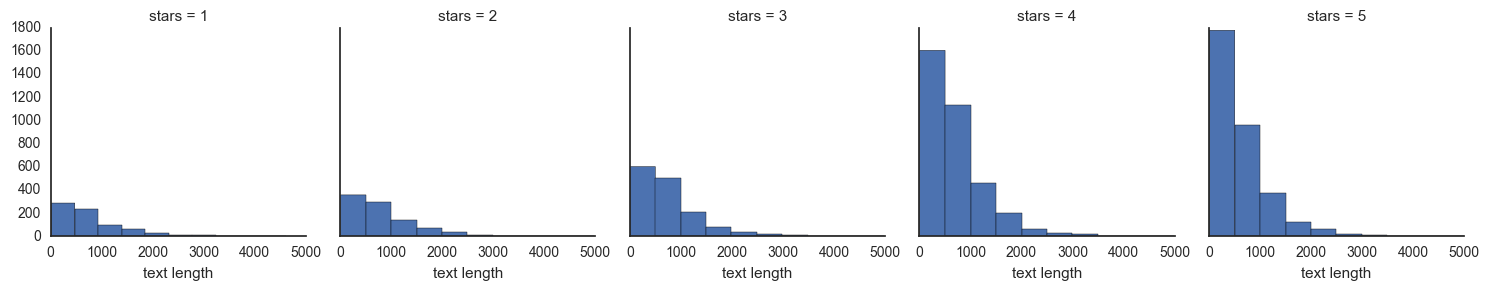

In [10]:
### EDA
import matplotlib.pyplot as plt
import sys
sys.path.append("C:\seaborn-master")
import seaborn as sns
sns.set_style('white')
%matplotlib inline

# length based off of the star ratings

g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length')



###  Median length is similar across different stars! Cannot use this as feature to do the classification.

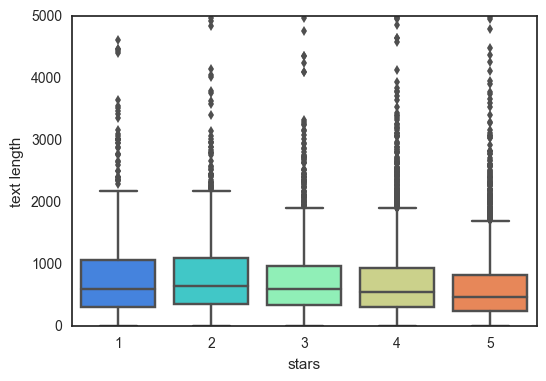

In [11]:

# boxplot of text length for each star category.**

sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow')



### There are more higher star ratings than lower.

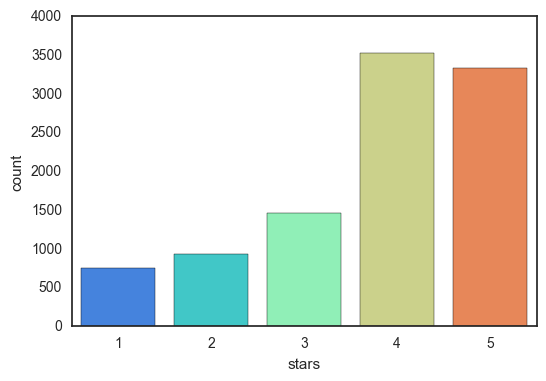

In [12]:

# countplot of the number of occurrences for each type of star rating.**

sns.countplot(x='stars',data=yelp,palette='rainbow')


### Length is positively correlated to the usefulness and funnyness of the review!

In [14]:
# ** Mean values of the numerical columns by stars**

stars = yelp.groupby('stars').mean()
stars



,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.524700
2,0.719525,1.563107,0.875944,842.265372
3,0.788501,1.306639,0.694730,758.505133
4,0.954623,1.395916,0.670448,712.944129
5,0.944261,1.381780,0.608631,625.015583


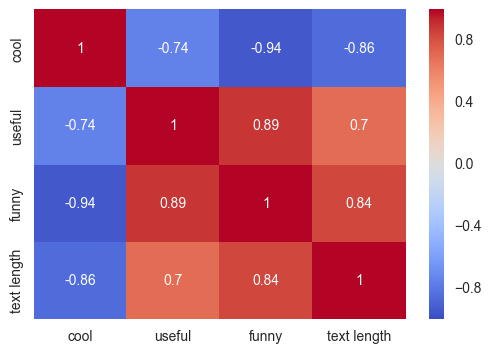

In [16]:
# Correlation heat map

stars.corr()
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)


## NLP Classification using vector counts

In [20]:

# NLP Classification Task

yelp_class = yelp

# X - predictor, y - response
X = yelp_class['text']
y = yelp_class['stars']



from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() # Count Vectorizer
X = cv.fit_transform(X) # fiting the yelp data and then transforming it into a sparse matrix


# Train Test Split

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)


# Training a Model - using only  vector count

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)


# Predictions 

predictions = nb.predict(X_test)

# Evaluation

from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))


[[ 57  35  12  79  37]
 [ 12  20  33 180  28]
 [  6   8  36 350  43]
 [  6   4  21 775 258]
 [  5   5   9 446 535]]


             precision    recall  f1-score   support

          1       0.66      0.26      0.37       220
          2       0.28      0.07      0.12       273
          3       0.32      0.08      0.13       443
          4       0.42      0.73      0.54      1064
          5       0.59      0.54      0.56      1000

avg / total       0.47      0.47      0.43      3000



### NLP Classification using TD - IDF

In [22]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])


# Training Test Split
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

# Fitting data into the pipeline
pipeline.fit(X_train,y_train)


# Predictions and Evaluation

predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  0   0   0 187  33]
 [  0   0   0 266   7]
 [  0   0   1 422  20]
 [  0   0   0 974  90]
 [  0   0   0 708 292]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       220
          2       0.00      0.00      0.00       273
          3       1.00      0.00      0.00       443
          4       0.38      0.92      0.54      1064
          5       0.66      0.29      0.40      1000

avg / total       0.50      0.42      0.33      3000



### Both these models does not produce an accurate model; other feat